In [1]:
#Importing the Libraries
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
# Problem 1 - Linear Regression
#Reading the data.
data = pd.read_csv("cubic_zirconia.csv")

In [3]:
#Sample of the dataset
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
# Problem 1.1
#we will drop the Unnamed:0 column as we dont need it for our analysis
gem_stone = data.drop(labels='Unnamed: 0' ,axis=1)

In [5]:
#Missing values in the dataset
gem_stone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [6]:
#shape of the data
gem_stone.shape

(26967, 10)

In [7]:
gem_stone.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [8]:
gem_stone.var

<bound method NDFrame._add_numeric_operations.<locals>.var of        carat        cut color clarity  depth  table     x     y     z  price
0       0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1       0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2       0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3       0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4       0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
26962   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52  4.09   5408
26963   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42  2.74   1114
26964   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15  3.17   1656
26965   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20  2.60    682
26966   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88  4.27   5166

[26967 rows x

In [9]:
#Univariate Analysis
gem_stone.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


In [10]:
#unique values for categorical variables
for column in gem_stone.columns:
    if gem_stone[column].dtype == 'object':
        print(column.upper(),': ',gem_stone[column].nunique())
        print(gem_stone[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [11]:
gem_stone.skew()

C:\Users\elton\AppData\Local\Temp/ipykernel_21900/3528412293.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gem_stone.skew()


carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

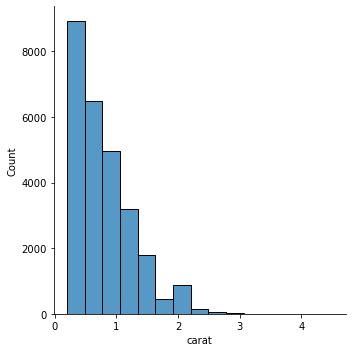

In [12]:
#Histogram of carat 
sns.displot(gem_stone.carat, bins=15);

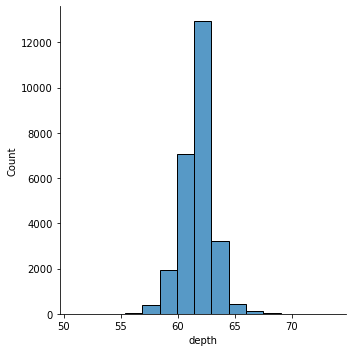

In [13]:
#Histogram of depth
sns.displot(gem_stone.depth, bins=15);

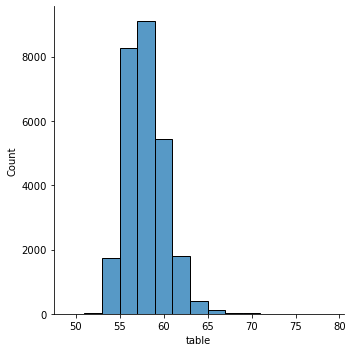

In [14]:
#Histogram of table 
sns.displot(gem_stone.table, bins=15);

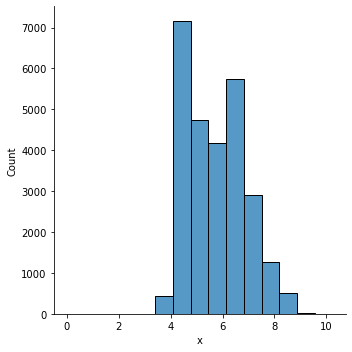

In [15]:
#Histogram of x
sns.displot(gem_stone.x, bins=15);

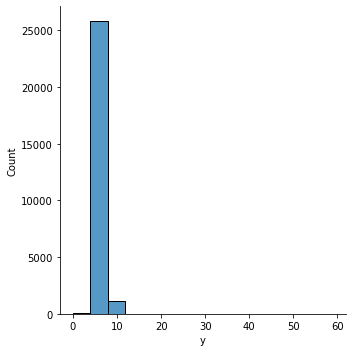

In [16]:
#Histogram of y
sns.displot(gem_stone.y, bins=15);

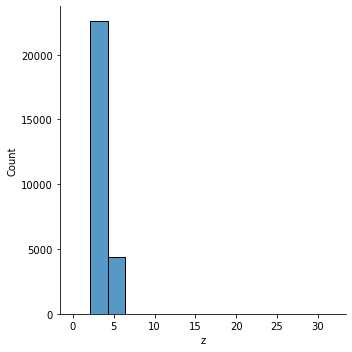

In [17]:
#Histogram of z
sns.displot(gem_stone.z, bins=15);

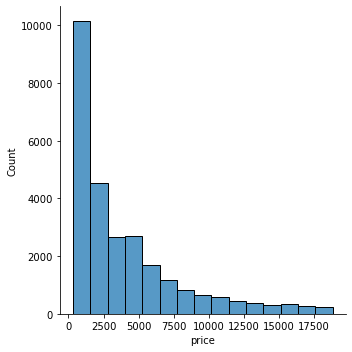

In [18]:
#Histogram of price
sns.displot(gem_stone.price, bins=15);

In [19]:
#Bivariate analysis -  
gem_stone.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


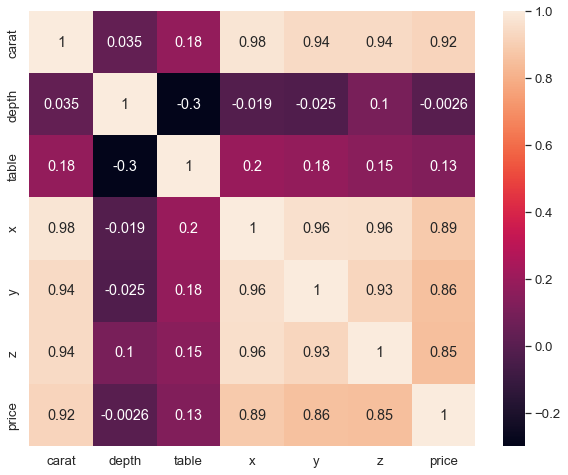

In [20]:
#Correlation Plot -
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(gem_stone.corr(), annot=True);

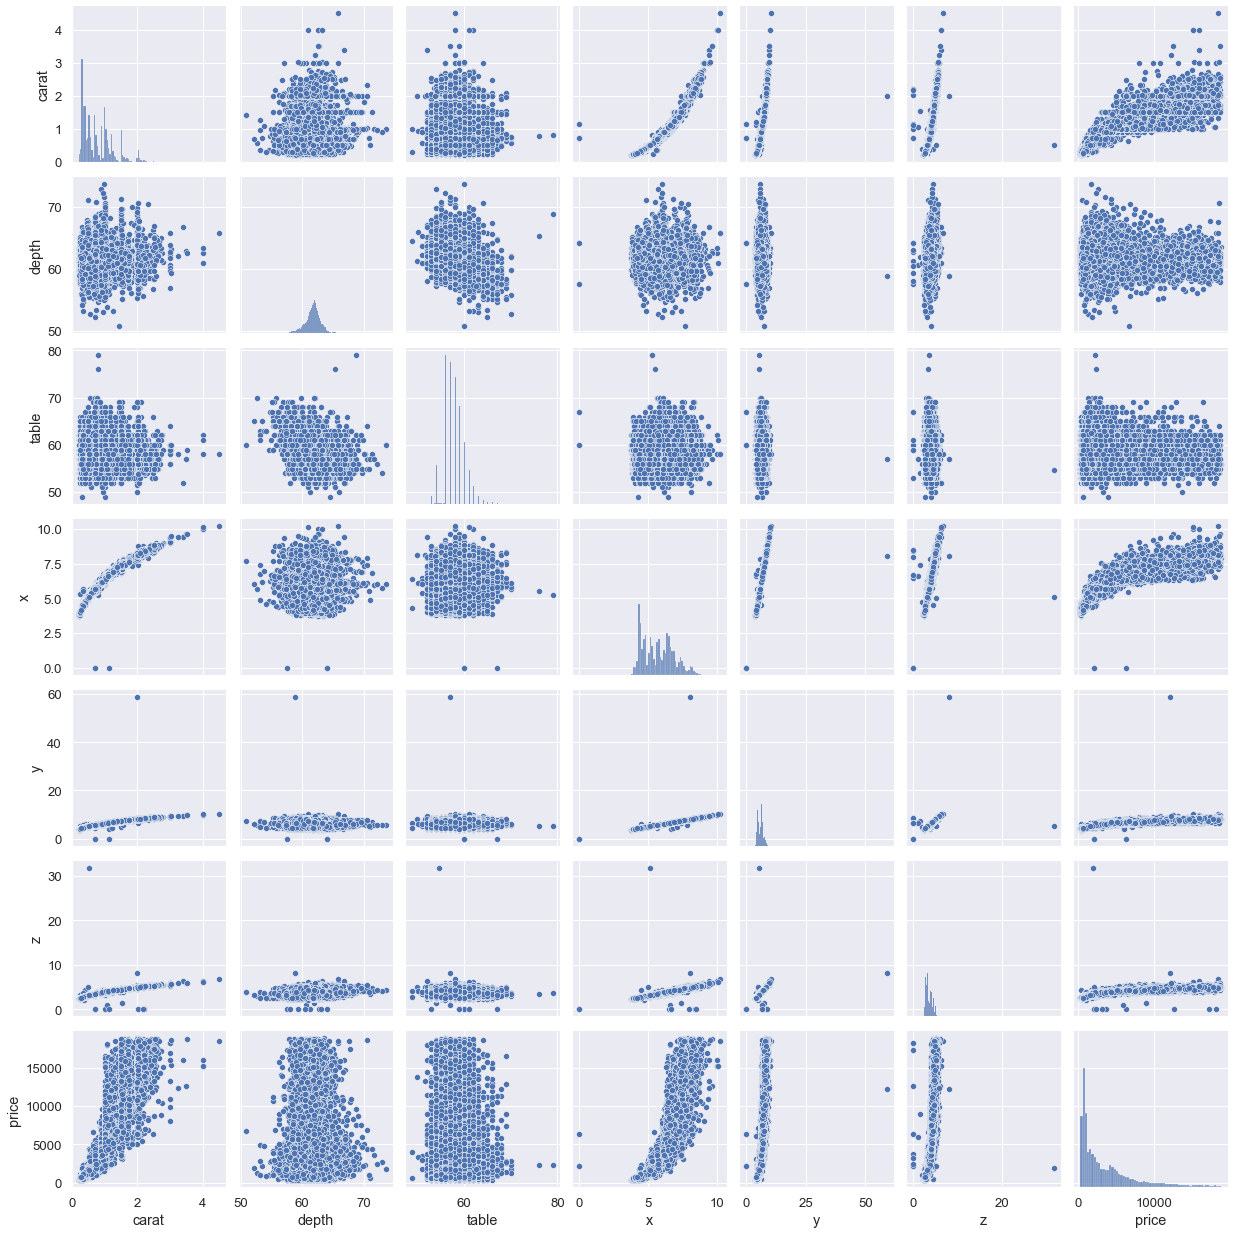

In [21]:
#Pairplot 
sns.pairplot(gem_stone)
plt.show()

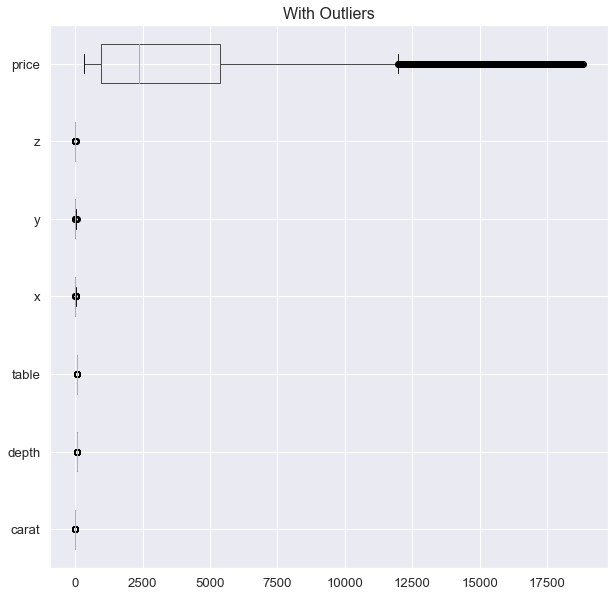

In [22]:
#Boxplot
cont=gem_stone.dtypes[(gem_stone.dtypes!='uint8') & (gem_stone.dtypes!='bool')].index
plt.figure(figsize=(10,10))
gem_stone[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

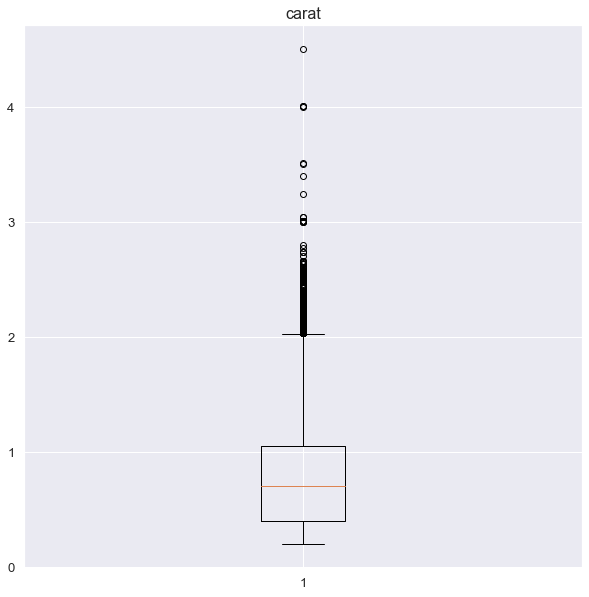

In [23]:
#Boxplot of carat -
plt.figure(figsize=(10,10))
plt.title('carat',fontsize=16)
plt.boxplot(gem_stone['carat'])
plt.show()

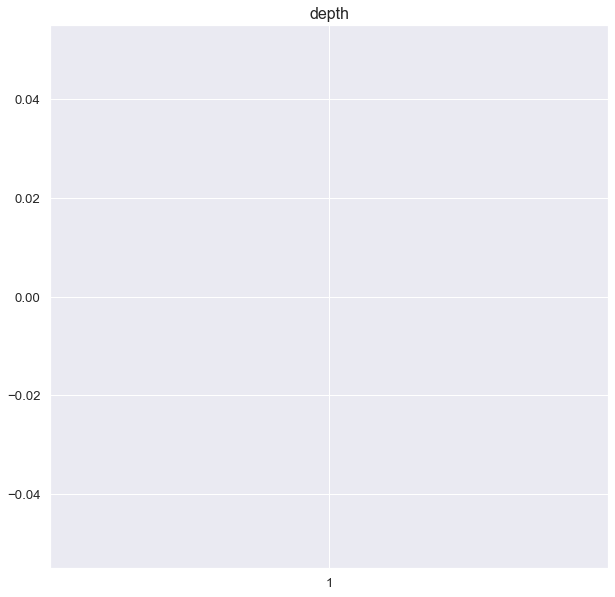

In [24]:
#Boxplot of depth -
plt.figure(figsize=(10,10))
plt.title('depth',fontsize=16)
plt.boxplot(gem_stone['depth'])
plt.show()

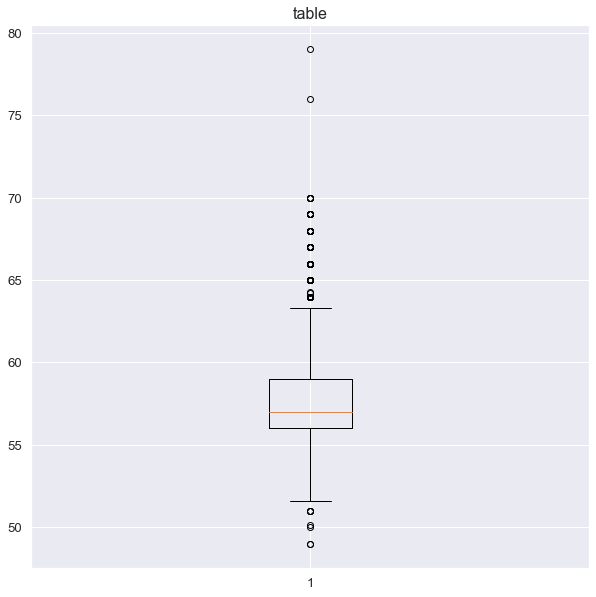

In [25]:
#Boxplot of table -
plt.figure(figsize=(10,10))
plt.title('table',fontsize=16)
plt.boxplot(gem_stone['table'])
plt.show()

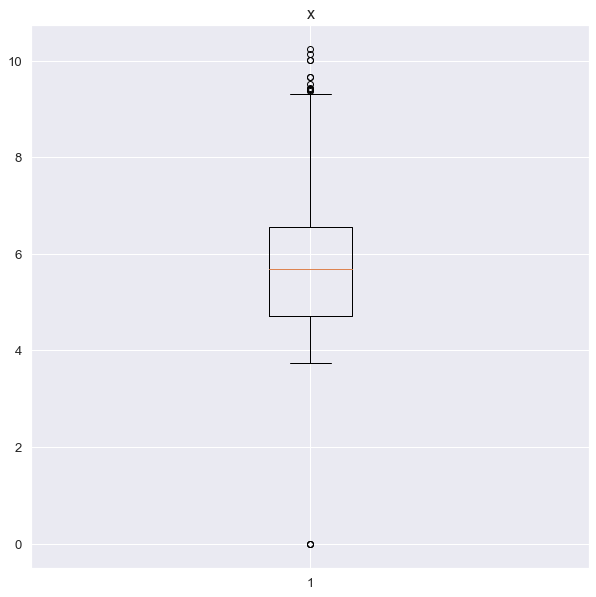

In [26]:
#Boxplot of x -
plt.figure(figsize=(10,10))
plt.title('x',fontsize=16)
plt.boxplot(gem_stone['x'])
plt.show()

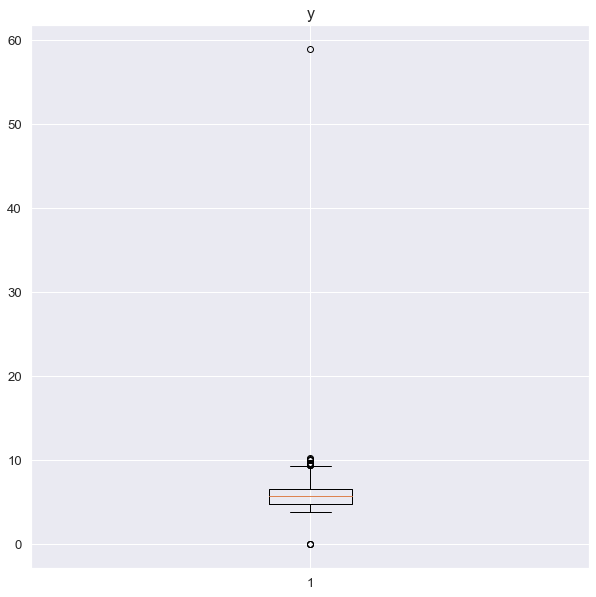

In [27]:
#Boxplot of y -
plt.figure(figsize=(10,10))
plt.title('y',fontsize=16)
plt.boxplot(gem_stone['y'])
plt.show()

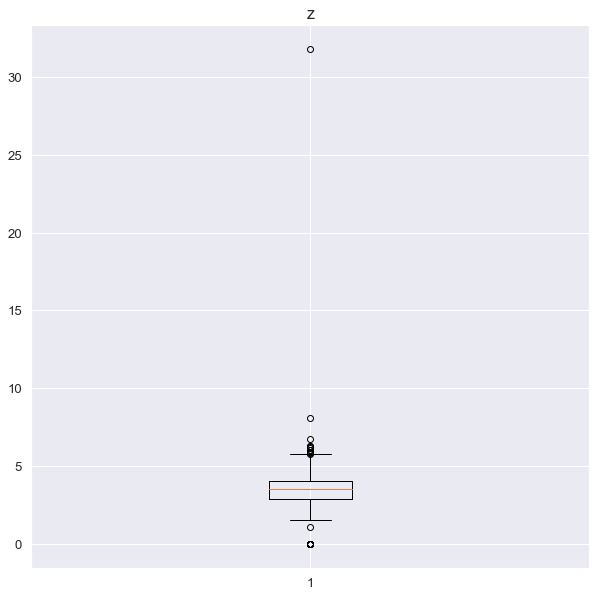

In [28]:
#Boxplot of z -
plt.figure(figsize=(10,10))
plt.title('z',fontsize=16)
plt.boxplot(gem_stone['z'])
plt.show()

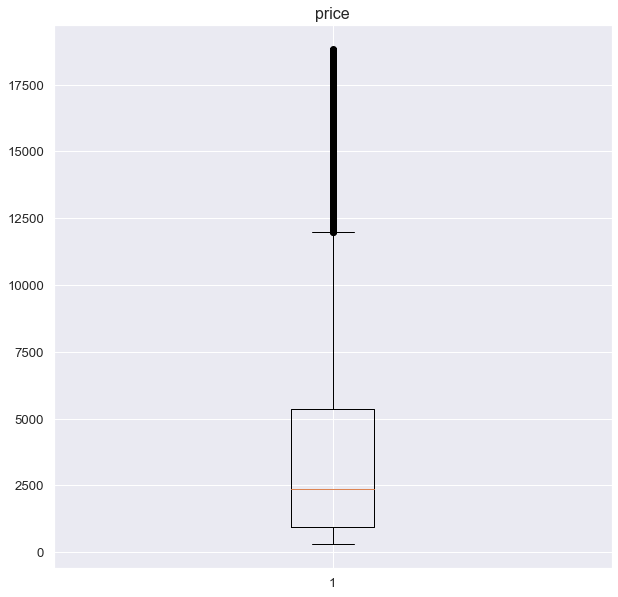

In [29]:
#Boxplot of price -
plt.figure(figsize=(10,10))
plt.title('price',fontsize=16)
plt.boxplot(gem_stone['price'])
plt.show()

In [30]:
#Checking for Duplicate values
dups = gem_stone.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

gem_stone[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [31]:
print('Shape Before',gem_stone.shape)
gem_stone.drop_duplicates(inplace=True) 
print('Shape After',gem_stone.shape)

Shape Before (26967, 10)
Shape After (26933, 10)


In [32]:
(gem_stone == 0).any(axis=1).sum()

8

In [33]:
gem_stone = pd.get_dummies(gem_stone, columns=['cut' , 'color' , 'clarity'], drop_first=True)

In [34]:
gem_stone.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
gem_stone.describe()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,...,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120,0.090410,0.401181,0.255671,...,0.152044,0.102662,0.053466,0.033082,0.243753,0.169458,0.151747,0.226228,0.068281,0.093937
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862,0.286773,0.490147,0.436246,...,0.359070,0.303523,0.224965,0.178854,0.429353,0.375163,0.358782,0.418396,0.252231,0.291746
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
#Outliers Treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [37]:
for column in gem_stone.columns:
    lr,ur=remove_outlier(gem_stone[column])
    gem_stone[column]=np.where(gem_stone[column]>ur,ur,gem_stone[column])
    gem_stone[column]=np.where(gem_stone[column]<lr,lr,gem_stone[column])

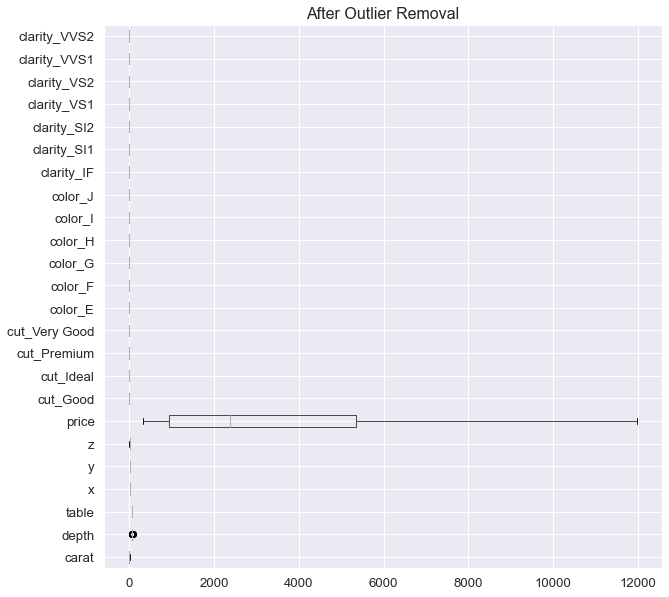

In [38]:
plt.figure(figsize=(10,10))
gem_stone.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [39]:
#Problem 1.2
#null values
gem_stone.isnull().sum()

carat              0
depth            697
table              0
x                  0
y                  0
z                  0
price              0
cut_Good           0
cut_Ideal          0
cut_Premium        0
cut_Very Good      0
color_E            0
color_F            0
color_G            0
color_H            0
color_I            0
color_J            0
clarity_IF         0
clarity_SI1        0
clarity_SI2        0
clarity_VS1        0
clarity_VS2        0
clarity_VVS1       0
clarity_VVS2       0
dtype: int64

In [40]:
#Imputing Null values
for column in gem_stone['depth']:
    if gem_stone['depth'].dtype != 'object':
        mean = gem_stone['depth'].mean()
        gem_stone['depth'] = gem_stone['depth'].fillna(mean)    
        
gem_stone.isnull().sum()        

carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

In [41]:
gem_stone.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
gem_stone.describe()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.0,26933.000000,26933.000000,...,26933.0,26933.0,26933.0,26933.0,26933.0,26933.0,26933.0,26933.0,26933.0,26933.0
mean,0.793298,61.745285,57.435544,5.729323,5.731255,3.536928,3735.832213,0.0,0.401181,0.255671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.462127,1.393848,2.157119,1.126175,1.118155,0.696753,3468.207359,0.0,0.490147,0.436246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.200000,50.800000,51.500000,1.950000,1.965000,1.190000,326.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000,0.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.025000,73.600000,63.500000,9.310000,9.285000,5.750000,11972.500000,0.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
gem_stone.shape

(26933, 24)

In [44]:
#Problem 1.3
#Splitting the data
X = gem_stone.drop('price', axis=1)
y = gem_stone[['price']]

In [45]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [46]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [47]:
list(enumerate(X_train.columns))

[(0, 'carat'),
 (1, 'depth'),
 (2, 'table'),
 (3, 'x'),
 (4, 'y'),
 (5, 'z'),
 (6, 'cut_Good'),
 (7, 'cut_Ideal'),
 (8, 'cut_Premium'),
 (9, 'cut_Very Good'),
 (10, 'color_E'),
 (11, 'color_F'),
 (12, 'color_G'),
 (13, 'color_H'),
 (14, 'color_I'),
 (15, 'color_J'),
 (16, 'clarity_IF'),
 (17, 'clarity_SI1'),
 (18, 'clarity_SI2'),
 (19, 'clarity_VS1'),
 (20, 'clarity_VS2'),
 (21, 'clarity_VVS1'),
 (22, 'clarity_VVS2')]

In [48]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9056.599600104772
The coefficient for depth is -107.20282009866389
The coefficient for table is -49.09783245656273
The coefficient for x is -2898.7463915588514
The coefficient for y is 2155.300639537146
The coefficient for z is -65.34696618719954
The coefficient for cut_Good is -2.0463630789890885e-12
The coefficient for cut_Ideal is 299.64740818624415
The coefficient for cut_Premium is 184.86371888602648
The coefficient for cut_Very Good is 0.0
The coefficient for color_E is 0.0
The coefficient for color_F is 0.0
The coefficient for color_G is 0.0
The coefficient for color_H is 0.0
The coefficient for color_I is 0.0
The coefficient for color_J is 0.0
The coefficient for clarity_IF is 0.0
The coefficient for clarity_SI1 is 0.0
The coefficient for clarity_SI2 is 0.0
The coefficient for clarity_VS1 is 0.0
The coefficient for clarity_VS2 is 0.0
The coefficient for clarity_VVS1 is 0.0
The coefficient for clarity_VVS2 is 0.0


In [49]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 10315.135299243633


In [50]:
# R square on training data
regression_model.score(X_train , y_train)

0.8837551402774602

In [51]:
# R square on testing data
regression_model.score(X_test, y_test)

0.8886963461631971

In [52]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1181.5976991207847

In [53]:
#MSE
metrics.mean_squared_error(y_train,predicted_train)

1396173.1225675324

In [54]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1158.999120458777

In [55]:
#Linear Regression using Statsmodel
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train],axis=1)
data_test = pd.concat([X_test , y_test], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22114,0.34,62.4,60.0,4.41,4.44,2.76,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,537.0
2275,0.30,61.2,55.0,4.35,4.31,2.65,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,844.0
19183,0.50,62.5,57.0,5.09,5.05,3.17,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1240.0
5030,1.10,63.3,56.0,6.53,6.58,4.15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4065.0
25414,1.02,61.1,62.0,6.54,6.49,3.98,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4057.0


In [56]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [57]:
data_train.rename(columns = {"cut_Very Good": "cut_verygood"}, 
                      inplace = True) 

data_test.rename(columns = {"cut_Very Good": "cut_verygood"}, 
                      inplace = True) 

In [58]:
expr= 'price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_verygood + color_E + color_F + color_G + color_H + color_I + color_J +clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [59]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula = expr , data=data_train).fit()
lm1.params

Intercept       1.031514e+04
carat           9.056600e+03
depth          -1.072028e+02
table          -4.909783e+01
x              -2.898746e+03
y               2.155301e+03
z              -6.534697e+01
cut_Good        2.757996e-13
cut_Ideal       2.996474e+02
cut_Premium     1.848637e+02
cut_verygood    0.000000e+00
color_E         0.000000e+00
color_F         0.000000e+00
color_G         0.000000e+00
color_H         0.000000e+00
color_I         0.000000e+00
color_J         0.000000e+00
clarity_SI1     0.000000e+00
clarity_SI2     0.000000e+00
clarity_VS1     0.000000e+00
clarity_VS2     0.000000e+00
clarity_VVS1    0.000000e+00
clarity_VVS2    0.000000e+00
dtype: float64

In [60]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                 1.791e+04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:34:49   Log-Likelihood:            -1.6013e+05
No. Observations:               18853   AIC:                         3.203e+05
Df Residuals:                   18844   BIC:                         3.203e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.032e+04    830.170     12.425   

C:\Users\elton\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [61]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [62]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1181.5976991207829

In [63]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

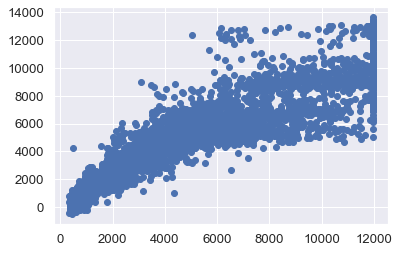

In [64]:
plt.scatter(y_test,y_pred)
plt.show()

In [65]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(10315.14) * Intercept + (9056.6) * carat + (-107.2) * depth + (-49.1) * table + (-2898.75) * x + (2155.3) * y + (-65.35) * z + (0.0) * cut_Good + (299.65) * cut_Ideal + (184.86) * cut_Premium + (0.0) * cut_verygood + (0.0) * color_E + (0.0) * color_F + (0.0) * color_G + (0.0) * color_H + (0.0) * color_I + (0.0) * color_J + (0.0) * clarity_SI1 + (0.0) * clarity_SI2 + (0.0) * clarity_VS1 + (0.0) * clarity_VS2 + (0.0) * clarity_VVS1 + (0.0) * clarity_VVS2 + 

In [66]:
# Problem 2 - Logistic Regresssion and LDA
#Reading the data.
holiday =pd.read_csv('Holiday_Package.csv')

In [67]:
holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [68]:
# Problem 2.1
#we will drop the Unnamed:0 column as we dont need it for our analysis
holiday_package = holiday.drop(labels='Unnamed: 0' ,axis=1)

In [69]:
#Missing values in the dataset
holiday_package.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [70]:
#shape of the data
holiday_package.shape

(872, 7)

In [71]:
holiday_package.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [72]:
holiday_package.var

<bound method NDFrame._add_numeric_operations.<locals>.var of     Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
0                 no   48412   30     8                  1                  1   
1                yes   37207   45     8                  0                  1   
2                 no   58022   46     9                  0                  0   
3                 no   66503   31    11                  2                  0   
4                 no   66734   44    12                  0                  2   
..               ...     ...  ...   ...                ...                ...   
867               no   40030   24     4                  2                  1   
868              yes   32137   48     8                  0                  0   
869               no   25178   24     6                  2                  0   
870              yes   55958   41    10                  0                  1   
871               no   74659   51    10        

In [73]:
#Univariate Analysis
holiday_package.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#unique values for categorical variables
for column in holiday_package.columns:
    if holiday_package[column].dtype == 'object':
        print(column.upper(),': ',holiday_package[column].nunique())
        print(holiday_package[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [75]:
holiday_package.skew()

C:\Users\elton\AppData\Local\Temp/ipykernel_21900/1772300939.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  holiday_package.skew()


Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

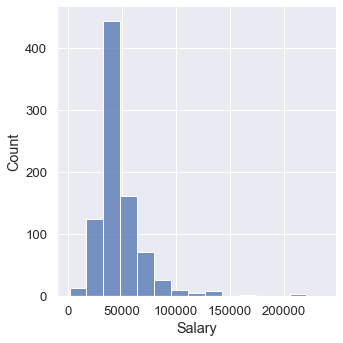

In [76]:
#Histogram of Salary
sns.displot(holiday_package.Salary, bins=15);

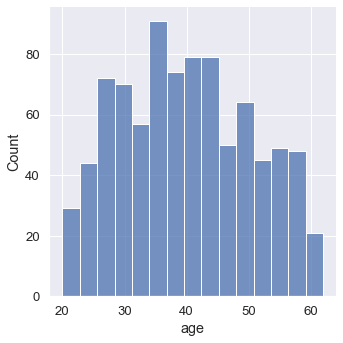

In [77]:
#Histogram of age
sns.displot(holiday_package.age, bins=15);

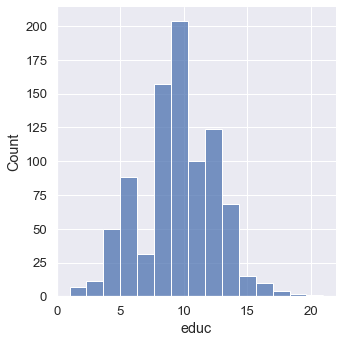

In [78]:
#Histogram of educ
sns.displot(holiday_package.educ, bins=15);

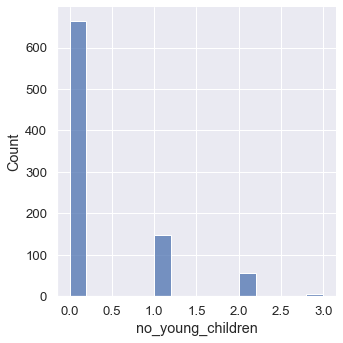

In [79]:
#Histogram of no_young_children
sns.displot(holiday_package.no_young_children, bins=15);

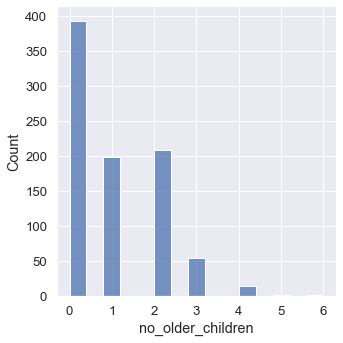

In [80]:
#Histogram of no_older_children
sns.displot(holiday_package.no_older_children, bins=15);

In [81]:
#Bivariate analysis -  
holiday_package.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


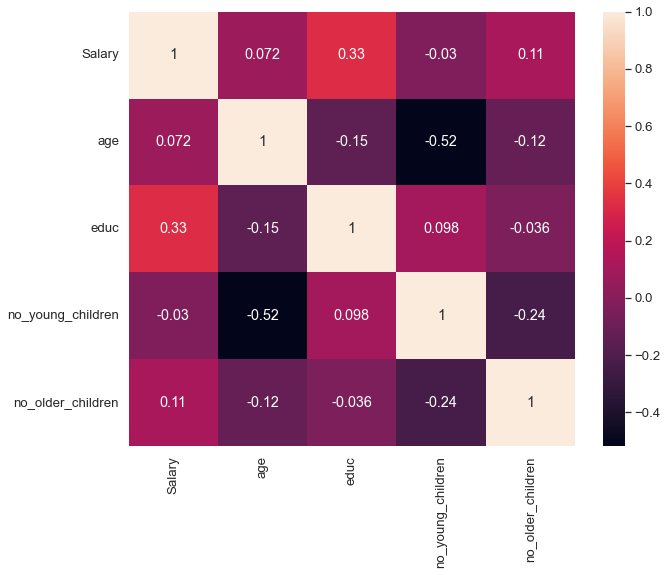

In [82]:
#Correlation Plot -
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(holiday_package.corr(), annot=True);

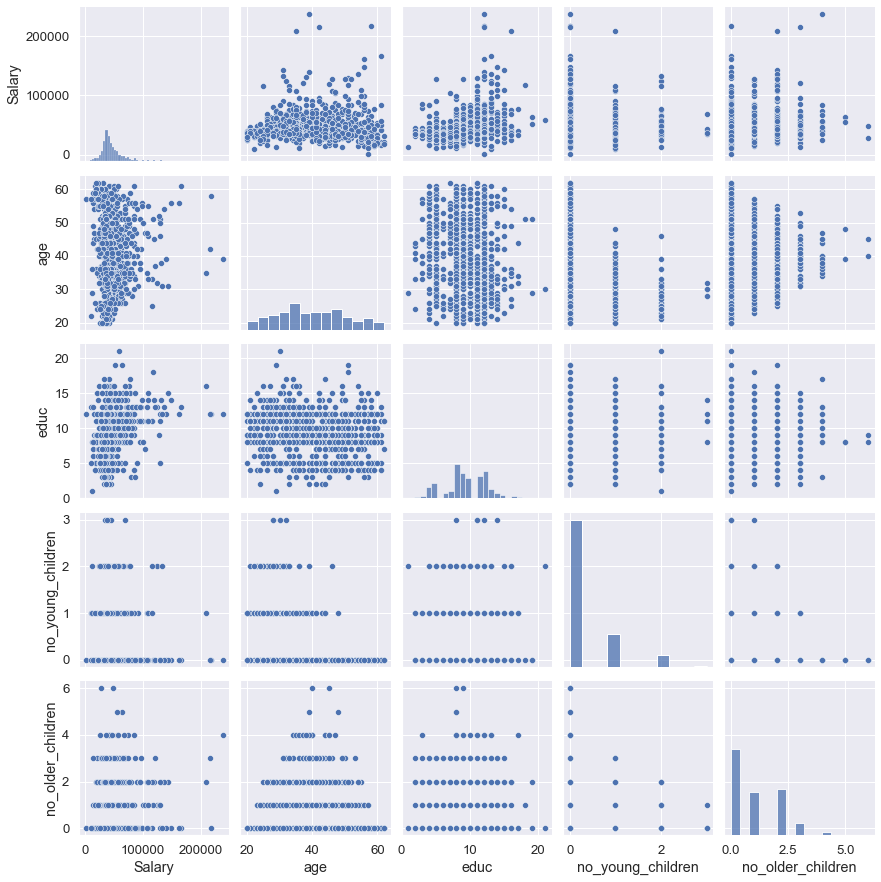

In [83]:
#Pairplot 
sns.pairplot(holiday_package)
plt.show()

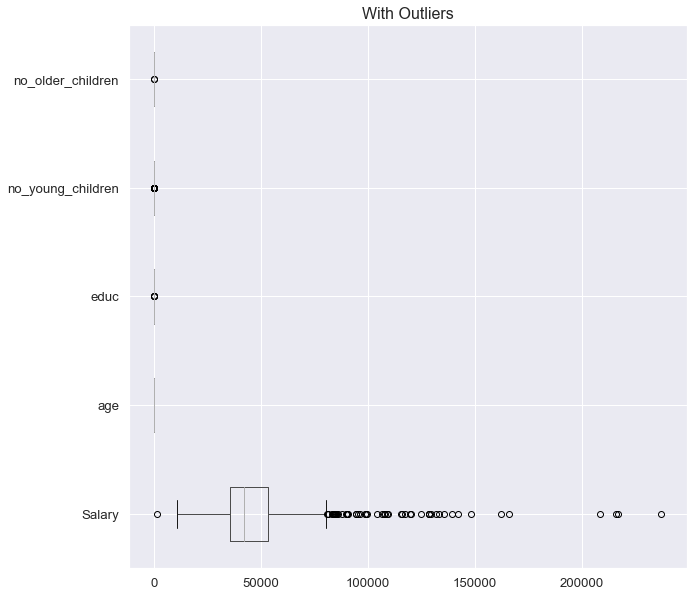

In [84]:
#Boxplot
cont=holiday_package.dtypes[(holiday_package.dtypes!='uint8') & (holiday_package.dtypes!='bool')].index
plt.figure(figsize=(10,10))
holiday_package[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

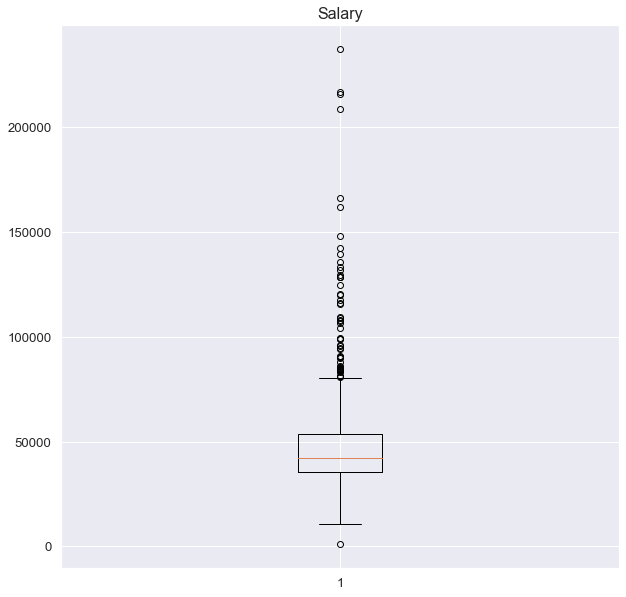

In [85]:
#Boxplot of Salary -
plt.figure(figsize=(10,10))
plt.title('Salary',fontsize=16)
plt.boxplot(holiday_package['Salary'])
plt.show()

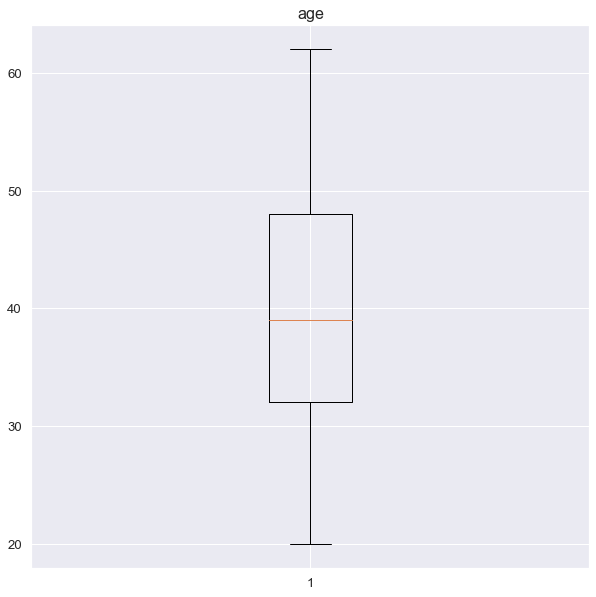

In [86]:
#Boxplot of age -
plt.figure(figsize=(10,10))
plt.title('age',fontsize=16)
plt.boxplot(holiday_package['age'])
plt.show()

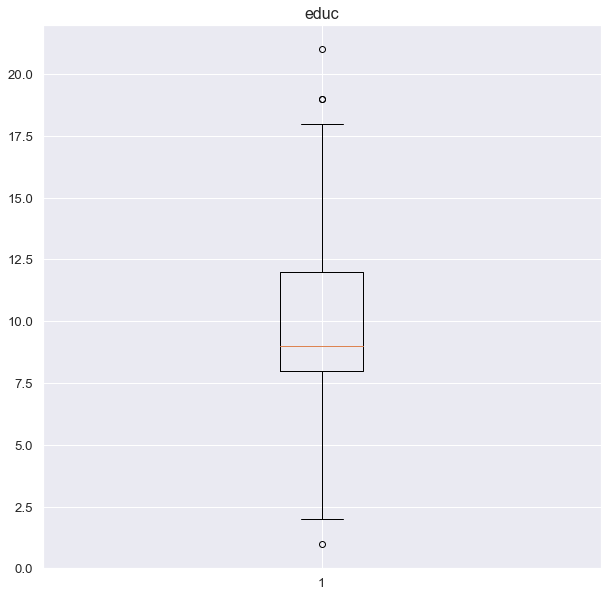

In [87]:
#Boxplot of educ -
plt.figure(figsize=(10,10))
plt.title('educ',fontsize=16)
plt.boxplot(holiday_package['educ'])
plt.show()

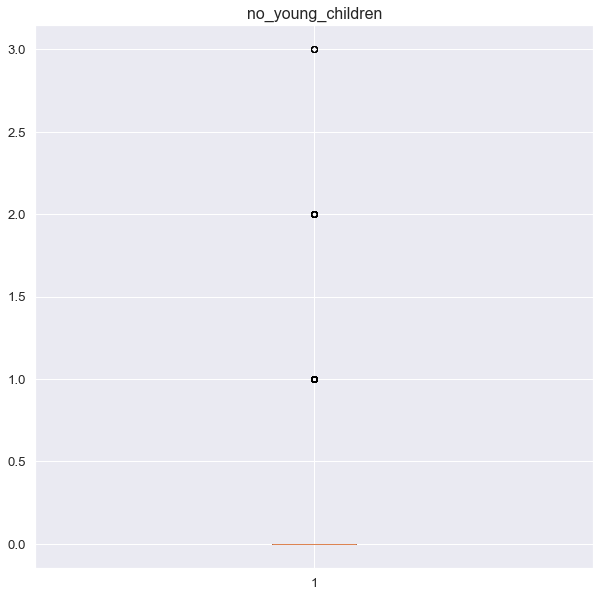

In [88]:
#Boxplot of no_young_children -
plt.figure(figsize=(10,10))
plt.title('no_young_children',fontsize=16)
plt.boxplot(holiday_package['no_young_children'])
plt.show()

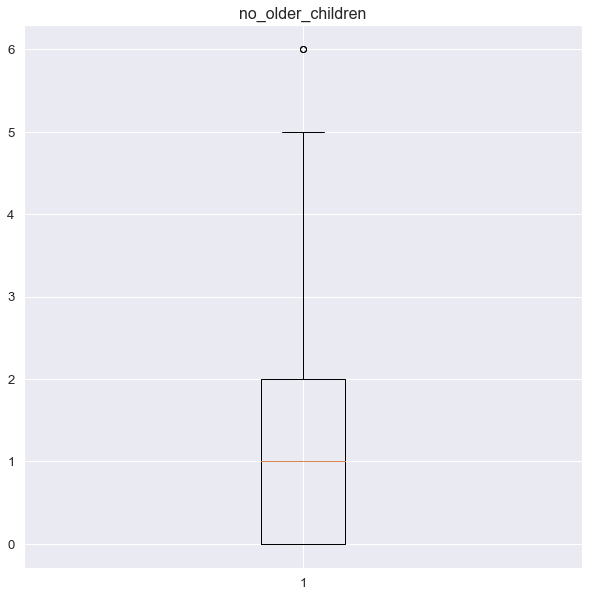

In [89]:
#Boxplot of no_older_children -
plt.figure(figsize=(10,10))
plt.title('no_older_children',fontsize=16)
plt.boxplot(holiday_package['no_older_children'])
plt.show()

In [90]:
#Checking for Duplicate values
dups = holiday_package.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

holiday_package[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [91]:
#Problem 2.2
#Encoding the strin values
for feature in holiday_package.columns:
    if holiday_package[feature].dtype == 'object':
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(holiday_package[feature].unique()))
        print(pd.Categorical(holiday_package[feature].unique()).codes)
        holiday_package[feature] = pd.Categorical(holiday_package[feature]).codes
       



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [92]:
holiday_package.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [93]:
#Train Test Split
X = holiday_package.drop('Holliday_Package', axis=1)
y = holiday_package['Holliday_Package']

In [94]:
holiday_package['Holliday_Package'].value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

In [95]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=holiday_package['Holliday_Package'])

In [96]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [97]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

In [98]:
#Problem 2.3
#Logistic Regression Model
# Fit the Logistic Regression model
model = LogisticRegression(solver = 'newton-cg' , max_iter = 10000, penalty='none' , verbose = True , n_jobs=2)
model.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [99]:
#Prediction on Training and Test data
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [100]:
#Getting the Predicted Classes and Probs
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685350,0.314650
1,0.539470,0.460530
2,0.697043,0.302957
3,0.496350,0.503650
4,0.557724,0.442276


In [101]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6672131147540984

AUC: 0.735


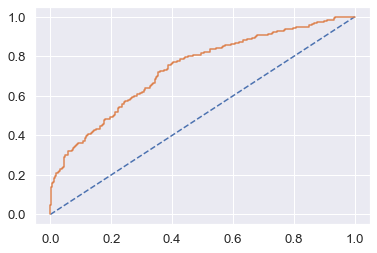

In [102]:
#AUC ROC for training data
# predicting probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# ploting the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [103]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6526717557251909

AUC: 0.735


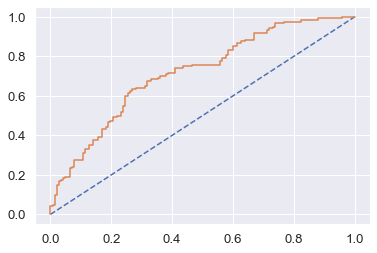

In [104]:
#AUC ROC for test data
# predicting probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculating AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# ploting the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [105]:
#Confusion matrics for training data
confusion_matrix(y_train , ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

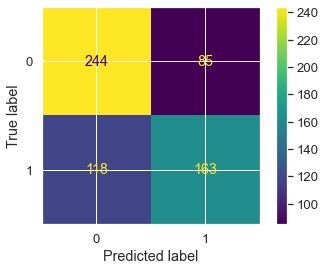

In [106]:
plot_confusion_matrix(model, X_train, y_train);

In [107]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [108]:
#Confusion matrics for test data
confusion_matrix(y_test, ytest_predict)

array([[109,  33],
       [ 58,  62]], dtype=int64)

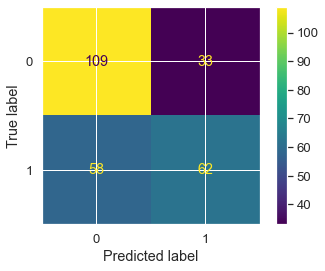

In [109]:
plot_confusion_matrix(model,X_test,y_test);

In [110]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



In [111]:
#LDA
clf = LinearDiscriminantAnalysis()
model = clf.fit(X_train , y_train)

In [112]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

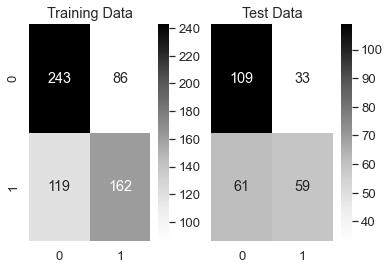

In [113]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [114]:
#Training Data and Test Data Classification Report Comparison
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



In [115]:
#Probability prediction for the training and test data
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [116]:
pred_prob_train[:,1]

array([0.7381512 , 0.28961707, 0.38234291, 0.76483486, 0.46682945,
       0.44346246, 0.37680169, 0.30948321, 0.61081614, 0.64208316,
       0.25213217, 0.26469615, 0.39923017, 0.04631524, 0.23022974,
       0.36249565, 0.53701148, 0.33367574, 0.63047975, 0.62551868,
       0.62038047, 0.26045898, 0.8778445 , 0.33010529, 0.09907975,
       0.83197262, 0.20726445, 0.7448485 , 0.52475576, 0.18602064,
       0.34007289, 0.32707499, 0.37873484, 0.42874061, 0.31084381,
       0.28746402, 0.11553843, 0.53094637, 0.47040748, 0.22122639,
       0.26026817, 0.80975365, 0.51459465, 0.74029285, 0.79737631,
       0.40099878, 0.298335  , 0.93065406, 0.44451279, 0.70660174,
       0.75490574, 0.46875931, 0.77220783, 0.37565531, 0.22661608,
       0.74188557, 0.26237721, 0.5247693 , 0.6721239 , 0.34088095,
       0.62335813, 0.57741879, 0.54295979, 0.45085985, 0.56389786,
       0.5965561 , 0.12149134, 0.57410954, 0.3890238 , 0.26157228,
       0.35655665, 0.7429183 , 0.76617151, 0.22742495, 0.42898

In [117]:
pred_class_train

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

AUC for the Training Data: 0.733


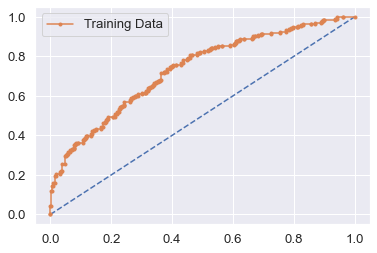

In [118]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.714


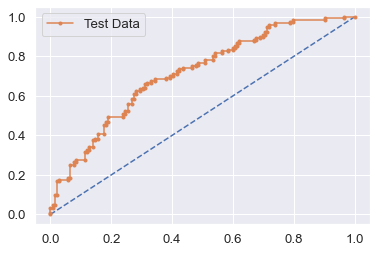

In [119]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_young_children'>

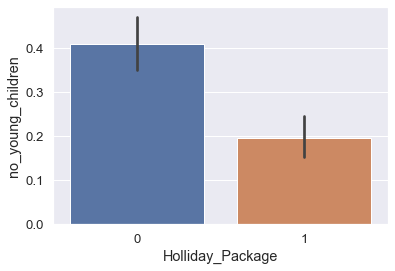

In [120]:
#Problem 2.4
sns.barplot(data = holiday_package,x= 'Holliday_Package', y= 'no_young_children')

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_older_children'>

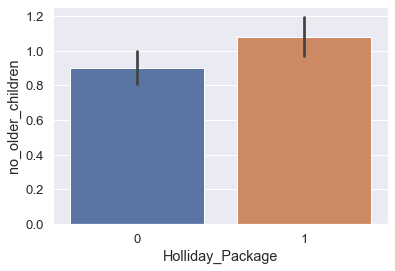

In [121]:
sns.barplot(data = holiday_package,x= 'Holliday_Package', y= 'no_older_children')

<AxesSubplot:xlabel='foreign', ylabel='Holliday_Package'>

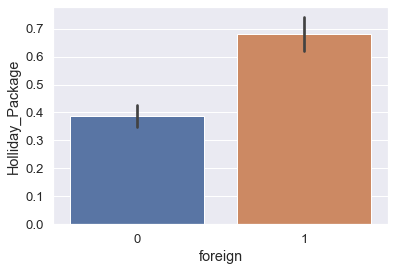

In [122]:
sns.barplot(data = holiday_package,x= 'foreign', y= 'Holliday_Package')

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

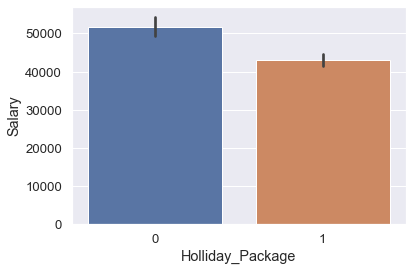

In [123]:
sns.barplot(data = holiday_package,x= 'Holliday_Package', y= 'Salary')

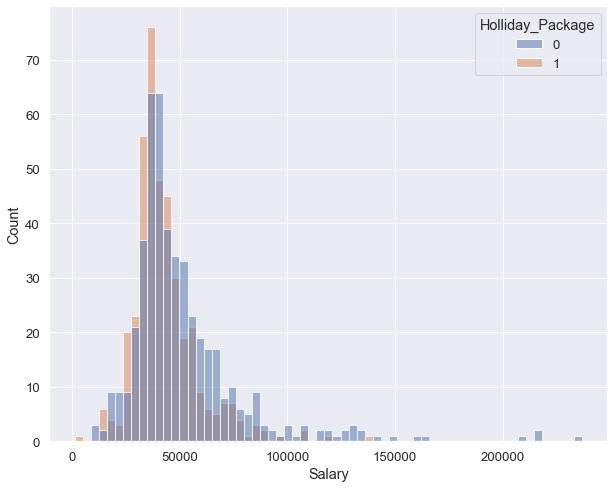

In [124]:
plt.figure(figsize=(10,8)) 
sns.histplot(data= holiday_package,x='Salary',hue='Holliday_Package',color='blue');